In [37]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n_samples = 2000

# Crop types: 0 = Wheat, 1 = Rice, 2 = Corn, 3 = Barley, 4 = Soybean
crop_types = ['Wheat', 'Rice', 'Corn', 'Barley', 'Soybean']

# Generate random features (using float64 type for explicit double precision)
N = np.random.uniform(10, 200, n_samples).astype(np.float64)  # Nitrogen
P = np.random.uniform(10, 200, n_samples).astype(np.float64)  # Phosphorus
K = np.random.uniform(10, 200, n_samples).astype(np.float64)  # Potassium
humidity = np.random.uniform(30, 90, n_samples).astype(np.float64)  # Humidity (percentage)
temperature = np.random.uniform(15, 40, n_samples).astype(np.float64)  # Temperature (Celsius)
soil_moisture = np.random.uniform(5, 50, n_samples).astype(np.float64)  # Soil Moisture (percentage)
soil_temperature = np.random.uniform(15, 35, n_samples).astype(np.float64)  # Soil Temperature (Celsius)

# Generate target variable (Crop Type)
crop_target = np.random.choice(crop_types, size=n_samples)

# Create a DataFrame
data = pd.DataFrame({
    'N': N,
    'P': P,
    'K': K,
    'Humidity': humidity,
    'Temperature': temperature,
    'Soil_Moisture': soil_moisture,
    'Soil_Temperature': soil_temperature,
    'Crop_Type': crop_target
})

# Convert all numeric columns to float64 (double precision) explicitly
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].astype(np.float64)

# # Round all numeric columns to 2 decimal places
# data[numeric_columns] = data[numeric_columns].round(2)

# Save the dataset to a CSV file
data.to_csv('crop_prediction_data.csv', index=False)

# Display a confirmation message
print("CSV file 'crop_prediction_data.csv' has been saved!")


CSV file 'crop_prediction_data.csv' has been saved!


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib  # For saving the model
import matplotlib.pyplot as plt
import seaborn as sns  # For better visualization of the confusion matrix

In [39]:
# Load the dataset
data = pd.read_csv('crop_prediction_data.csv')

# Display the first few rows of the dataset
print(data.head())

            N           P           K   Humidity  Temperature  Soil_Moisture  \
0   81.162623   59.724080  118.679217  68.895417    33.006698      21.813837   
1  190.635718   56.925972  163.032143  40.343182    32.182075      19.981044   
2  149.078849  182.188370  154.430577  82.343674    17.393855      12.926926   
3  123.745112   57.413778   39.240982  66.786974    38.064310      32.327000   
4   39.643542   61.670448   38.357399  39.432233    29.211805      26.448087   

   Soil_Temperature Crop_Type  
0         28.086126      Rice  
1         16.600651      Corn  
2         19.846596      Corn  
3         30.473587      Corn  
4         25.573717      Rice  


In [40]:
# Preprocess the data

# Encode the target variable 'Crop_Type' into numerical values
data['Crop_Type'] = data['Crop_Type'].map({'Wheat': 0, 'Rice': 1, 'Corn': 2, 'Barley': 3, 'Soybean': 4})

# Define features (X) and target (y)
X = data.drop('Crop_Type', axis=1)  # Features
y = data['Crop_Type']  # Target variable (crop type)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Initialize the Random Forest classifier with warm_start=True
rf = RandomForestClassifier(n_estimators=100, random_state=42, warm_start=True)

In [42]:
# Print the model name
model_name = "RandomForestClassifier"
print(f"Model being used: {model_name}")

Model being used: RandomForestClassifier


In [43]:
# Lists to store accuracy and error
train_accuracies = []
train_errors = []

In [44]:
# Training with tracking accuracy at each iteration
n_estimators = 100  # Total number of trees to train
for i in range(1, n_estimators + 1):
    # Train the model by adding one tree at a time
    rf.n_estimators = i
    rf.fit(X_train, y_train)
    
    # Evaluate training accuracy
    train_accuracy = accuracy_score(y_train, rf.predict(X_train))
    train_accuracies.append(train_accuracy)
    
    # Calculate training error (1 - accuracy)
    train_error = 1 - train_accuracy
    train_errors.append(train_error)

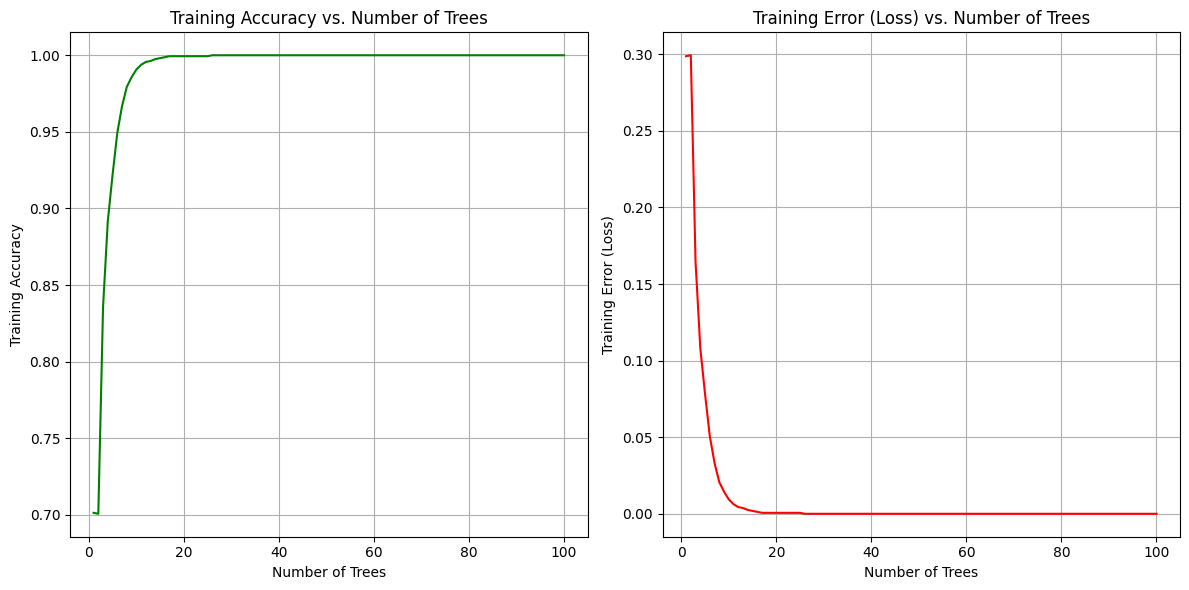

In [45]:
# Plot the training accuracy and error (loss)
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, n_estimators + 1), train_accuracies, label='Training Accuracy', color='green')
plt.title('Training Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Training Accuracy')
plt.grid(True)

# Plot training error (loss)
plt.subplot(1, 2, 2)
plt.plot(range(1, n_estimators + 1), train_errors, label='Training Error (Loss)', color='red')
plt.title('Training Error (Loss) vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Training Error (Loss)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
# Save the trained model to a file
joblib.dump(rf, 'crop_prediction_model.pkl')

print("Model saved successfully as 'crop_prediction_model.pkl'")

Model saved successfully as 'crop_prediction_model.pkl'


In [47]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [48]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Wheat', 'Rice', 'Corn', 'Barley', 'Soybean']))

Accuracy: 0.185
Classification Report:
              precision    recall  f1-score   support

       Wheat       0.16      0.17      0.17        82
        Rice       0.15      0.14      0.15        78
        Corn       0.23      0.25      0.24        79
      Barley       0.22      0.20      0.21        85
     Soybean       0.15      0.16      0.16        76

    accuracy                           0.18       400
   macro avg       0.18      0.18      0.18       400
weighted avg       0.18      0.18      0.18       400



Confusion Matrix:
[[14 17 14 18 19]
 [21 11 19 15 12]
 [12 16 20 14 17]
 [21 10 19 17 18]
 [18 19 14 13 12]]


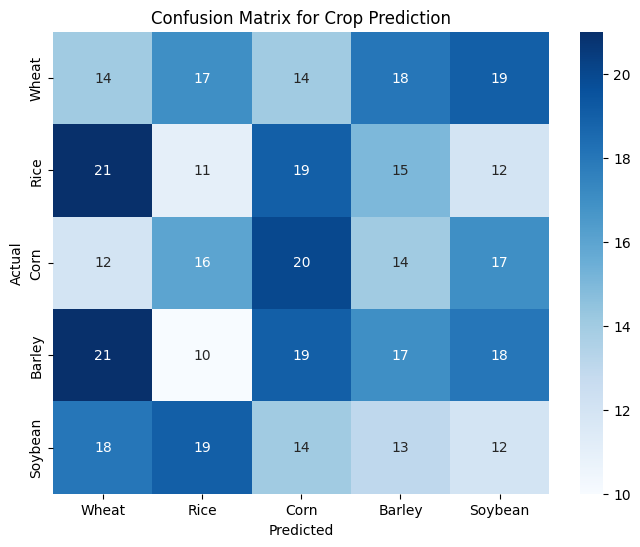

In [49]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Wheat', 'Rice', 'Corn', 'Barley', 'Soybean'], yticklabels=['Wheat', 'Rice', 'Corn', 'Barley', 'Soybean'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Crop Prediction')
plt.show()

In [50]:
# Visualize Feature Importance
importances = rf.feature_importances_

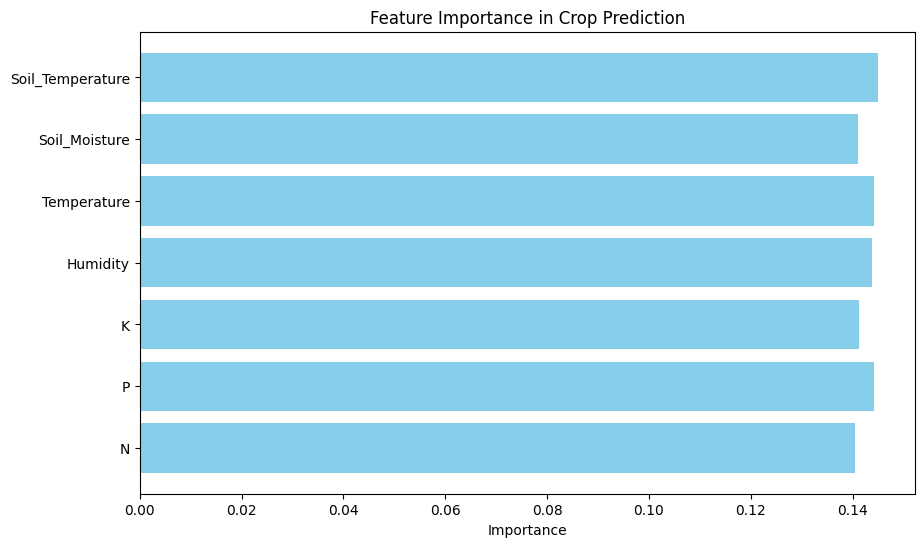

In [51]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Crop Prediction')
plt.show()

In [52]:
# Load the saved model
loaded_model = joblib.load('crop_prediction_model.pkl')

In [56]:
# Predict on new data
# Example: New data point (you can replace with actual values)
new_data = np.array([[230, 254, 462, 30, 40, 64, 32]])  # Example input values for N, P, K, Humidity, Temperature, Soil_Moisture, Soil_Temperature

# Convert new_data to a DataFrame with the same column names as training data
new_data_df = pd.DataFrame(new_data, columns=X.columns)

# Predict the crop type using the loaded model
new_prediction = loaded_model.predict(new_data_df)

# Map the numerical prediction back to the crop name
crop_mapping = {0: 'Wheat', 1: 'Rice', 2: 'Corn', 3: 'Barley', 4: 'Soybean'}
predicted_crop = crop_mapping[new_prediction[0]]

print(f"The predicted crop for the given data is: {predicted_crop}")


The predicted crop for the given data is: Soybean
